**1. Gunakan data 'CARS.csv'!**

In [1]:
##### Jawaban #####

#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

#Import data
datacars = pd.read_csv('CARS.csv')
datacars

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


**2. Berapakah ukuran datanya?**

In [2]:
##### Jawaban #####

#Ukuran data
len(datacars)

4345

**3. Periksa deskripsi data (dengan data.describe()). Apakah anda melihat hal-hal menarik, yang 
perlu mendapat perhatian?**

In [3]:
##### Jawaban #####

#Deskripsi data
datacars.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


Hal menarik dari data CARS ini yaitu dari 4345 baris data bahwa rata-rata volume mesin mobil sebesar 2.79 galon dengan rata-rata jarak tempuh sebesar 161.24 mil dan rata-rata kisaran harga 19418.75 dolar.

**4. Buanglah kolom 'Model'!**

In [4]:
##### Jawaban #####

#Membuang kolom 'Model'
datacars = datacars.drop(['Model'], axis = 1)
datacars

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


**5. Buanglah semua yang mengandung missing value!**

In [5]:
##### Jawaban #####

#Cek data 'Unknown'
datacars.replace('Unknown', np.nan, inplace = True)
datacars

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [6]:
#Cek missing value
datacars.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Dataset CARS mengandung missing value pada kolom 'Price' sebanyak 172 data dan pada kolom 'EngineV' sebanyak 150 data.

In [7]:
#Drop missing value
datacars = datacars.dropna()
datacars

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


**6. Berapakah ukuran data sekarang?**

In [8]:
##### Jawaban #####

#Ukuran data terbaru
len(datacars)

4025

Ukuran data setelah dilakukan penghapusan missing value yaitu sebanyak 4025 baris.

**7. Buat histogram untuk 'Price'. Apa komentar Anda?**

Text(0.5, 0, 'Price')

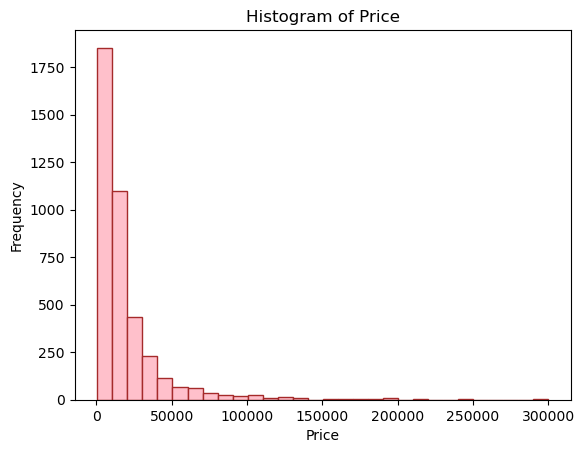

In [9]:
##### Jawaban #####

#Histogram 'Price'
datacars['Price'].plot.hist(bins = 30, edgecolor = 'brown', color = 'pink')
plt.title('Histogram of Price')
plt.xlabel('Price')

- Plot histogram 'Price' menunjukkan bahwa harga mobil kurang dari 10000 terjual dalam jumlah besar yaitu lebih dari 1750 unit.
- Semakin tinggi harga mobil, maka jumlah penjualannya semakin rendah.

**8. Buat histogram untuk 'Mileage'. Apa komentar Anda?**

Text(0.5, 0, 'Mileage')

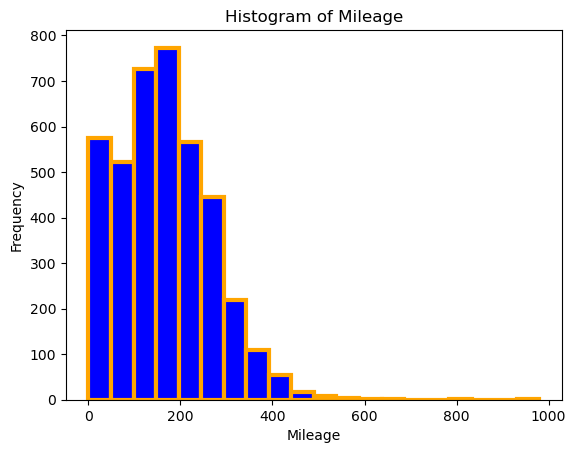

In [10]:
##### Jawaban #####

#Histogram 'Mileage'
datacars['Mileage'].plot.hist(bins = 20, edgecolor = 'orange', color = 'blue', lw = 3)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')

- Plot histogram 'Mileage' menunjukkan bahwa jarak tempuh mobil antara 150 hingga 200 terjual dalam jumlah besar yaitu lebih dari 750 unit.
- Jarak tempuh mobil 20 hingga 40 memiliki penurunan penjualan.
- Semakin tinggi jarak tempuh mobil, maka jumlah penjualannya dominan semakin rendah.

**9. Buat histogram untuk 'EngineV'. Apa komentar Anda?**

Text(0.5, 0, 'EngineV')

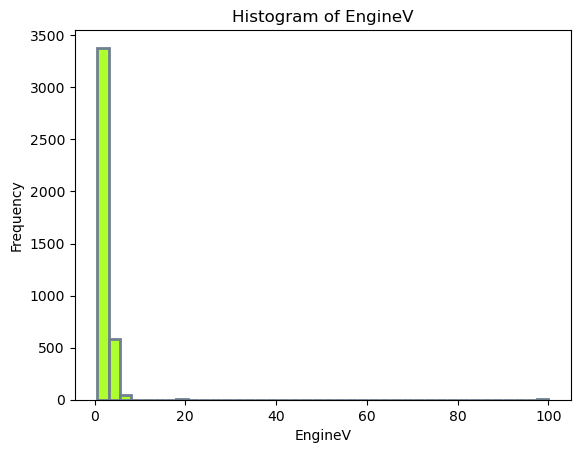

In [11]:
##### Jawaban #####

#Histogram 'EngineV'
datacars['EngineV'].plot.hist(bins = 40, edgecolor = 'slategray', color = 'greenyellow', lw = 2)
plt.title('Histogram of EngineV')
plt.xlabel('EngineV')

- Plot histogram 'EngineV' menunjukkan bahwa volume kapasitas mobil sekitar kurang dari 3 terjual dalam jumlah besar yaitu lebih dari 3250 unit.
- Semakin besar volume kapasitas mobil, maka jumlah penjualannya semakin rendah.

**10. Siapkan variabel-variabel untuk linear regression. Dengan variabel-variabel ‘Mileage’, 
‘EngineV’, dan ‘Year’ sebagai variabel independent dan variabel ‘Price’ sebagai variabel 
dependen.**

In [12]:
##### Jawaban #####

datacars = datacars.select_dtypes(include = 'number')
datacars

#Variabel independen
x = datacars.drop(['Price'], axis =1)
x

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011
...,...,...,...
4339,35,1.6,2014
4340,9,3.0,2014
4341,1,3.5,1999
4342,194,2.0,1985


In [13]:
#Variabel dependen
y = datacars['Price']
y

0         4200.0
1         7900.0
2        13300.0
3        23000.0
4        18300.0
          ...   
4339     17900.0
4340    125000.0
4341      6500.0
4342      8000.0
4344     13500.0
Name: Price, Length: 4025, dtype: float64

Text(0.5, 1.0, 'Boxplot of Independent Variable')

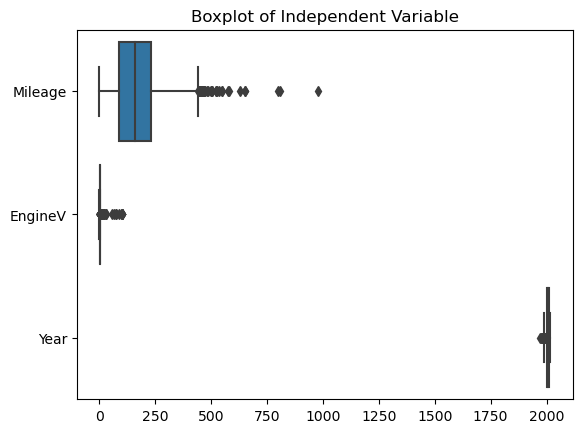

In [14]:
#Boxplot variabel independen
sns.boxplot(data = x, orient = "h")
plt.title('Boxplot of Independent Variable')

Bloxplot variabel independen menunjukkan bahwa 'Mileage', 'EngineV', dan 'Year' memiliki nilai outlier atau data ekstrim.

Text(0.5, 1.0, 'Boxplot of Dependent Variable')

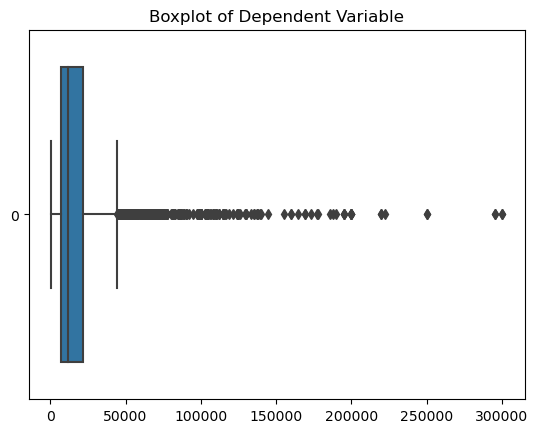

In [15]:
#Boxplot variabel dependen
sns.boxplot(data = y, orient = 'h')
plt.title('Boxplot of Dependent Variable')

Bloxplot variabel dependen menunjukkan bahwa 'Price' juga memiliki nilai outlier atau data ekstrim.

Text(0.5, 1.0, 'Distribution of Price')

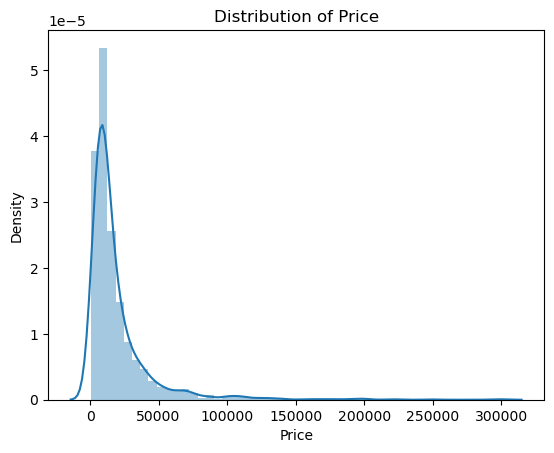

In [16]:
#Distribusi variabel 'Price'
sns.distplot(y)
plt.title('Distribution of Price')

Plot distribusi variabel dependen menunjukkan bahwa 'Price' memiliki distribusi normal.

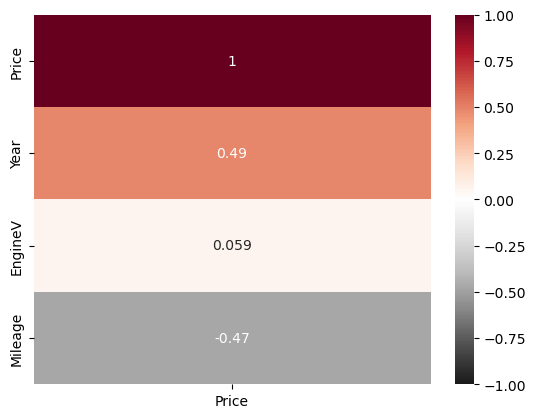

In [17]:
#Melihat korelasi antar variabel
sns.heatmap(datacars.corr()[['Price']].sort_values('Price', ascending = False), cmap = 'RdGy_r', annot = True, vmin = -1, vmax = 1)
plt.show()

- Korelasi 'Mileage' dengan 'Price' sebesar -0.47, artinya memiliki hubungan negatif tidak cukup kuat.
- Korelasi 'EngineV' dengan 'Price' sebesar 0.059, artinya memiliki hubungan positif sangat rendah.
- Korelasi 'Year' dengan 'Price' sebesar 0.49, artinya memiliki hubungan positif tidak cukup kuat.

**11. Buat train-test split dengan ukuran data test = 40%!**

In [18]:
##### Jawaban #####

#Data training testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [19]:
x_train

,Mileage,EngineV,Year
2650,65,1.6,2009
3686,16,3.0,2015
2798,91,1.5,2009
1582,121,2.0,2014
4123,144,1.6,2013
...,...,...,...
1215,99,2.5,2011
1398,1,1.4,2014
929,107,1.8,2008
3790,1,2.5,2000


In [20]:
y_train

2650     9800.0
3686    72900.0
2798     8400.0
1582    16900.0
4123     8900.0
         ...   
1215    12300.0
1398    10493.0
929     17300.0
3790     6300.0
3435     9000.0
Name: Price, Length: 2415, dtype: float64

In [21]:
x_test

,Mileage,EngineV,Year
1862,80,2.0,2011
1295,96,2.0,2008
2946,175,3.0,2006
2093,137,1.5,2014
1318,220,2.5,2003
...,...,...,...
2293,388,4.3,2000
3078,350,3.0,1994
2363,102,2.0,2011
2195,167,1.6,2011


In [22]:
y_test

1862    23000.0
1295     8900.0
2946    14300.0
2093     8300.0
1318     8500.0
         ...   
2293     8500.0
3078     6900.0
2363    17500.0
2195    12800.0
2194     7200.0
Name: Price, Length: 1610, dtype: float64

**12. Lakukan training linier regression!**

In [23]:
##### Jawaban #####

#Regresi
regresi = LinearRegression()
regresi = regresi.fit(x_train, y_train)
regresi

LinearRegression()

In [24]:
#Prediksi Y
y_pred = regresi.predict(x_test)
y_pred

array([ 30197.13053145,  25823.78574395,  18009.76504909, ...,
        28515.49540259,  23417.10672671, -13358.92287766])

In [25]:
#Intersep
regresi.intercept_

-2076113.623470106

In [26]:
#Koefisien
pd.DataFrame(zip(x_train, regresi.coef_))

,0,1
0,Mileage,-76.437960
1,EngineV,324.803124
2,Year,1050.112474


**13. Dapatkan $R^2$
, MAE, MAPE, RMSE, MSE dan interpretasi hasilnya!**

In [27]:
##### Jawaban #####

#Import package
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [28]:
print('Nilai R2   :', round(r2_score(y_test, y_pred), 4))
print('Nilai MAE  :', round(mae(y_test, y_pred), 2))
print('Nilai MAPE :', round(mape(y_test, y_pred)*100, 2))
print('Nilai RMSE :', round(mse(y_test, y_pred, squared = False), 2))
print('Nilai MSE  :', round(mse(y_test, y_pred), 2))

Nilai R2   : 0.2992
Nilai MAE  : 12216.92
Nilai MAPE : 108.73
Nilai RMSE : 21221.07
Nilai MSE  : 450333744.66


**Interpretasi:**
>- $R2$ : Semua variabel independen pada model secara simultan berpengaruh sebesar 29.92% terhadap target. Sedangkan 70.08% lainnya merupakan variabel yang tidak diketahui. Sehingga kemampuan variabel–variabel independen dalam menjelaskan variabel dependen cukup terbatas.
>- $MAE$ : Nilai penyimpangan rata-rata dari model sebesar 12216.92 dari nilai aktual.
>- $MAPE$ : Kemungkinan error atau penyimpangan dari model sebesar 108.73% dari nilai aktual.
>- $RMSE$ : Nilai penyimpangan rata-rata dari model sebesar 21221.07 dari nilai aktual.
>- $MSE$ : Nilai penyimpangan rata-rata terbesar dari model adalah 450333744.66 dari nilai aktual.

>- Besarnya error pada model dikarenakan bervariasinya rata-rata dari masing-masing variabel.
>- Pada data **CARS** ini menunjukkan bahwa hasil R2 kecil yang diikuti dengan tingginya error pada model. Meskipun model menghasilkan error tinggi, tetapi terdapat berbagai insight yang dapat diambil.
>- Tingginya error juga dikarenakan adanya variabel yang belum diketahui pada model ini, sehingga kontribusi variabel independen terhadap dependen belum maksimal.

**14. Gunakan OLS pada statsmodels untuk memeriksa statistik dari train. Berapakah hasil R2? 
Tulis hasil persamaan regresi, Tentukan variabel yang mana yang significant! Apa kesimpulan 
Anda?**

In [29]:
##### Jawaban #####

#OLS train
x_train = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.07e-163
Time:                        14:56:38   Log-Likelihood:                -27609.
No. Observations:                2415   AIC:                         5.523e+04
Df Residuals:                    2411   BIC:                         5.525e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.076e+06   1.87e+05    -11.100      0.000   -2.44e+06   -1.71e+06
Mileage      -76.4380      6.176    -12.377      0.000     -88.548     -64.328
EngineV      324.8031     86.529      3.754      0.000     155.124     494.482
Year        1050.1125     92.879     11.306      0.000     867.982    1232.243
==============================================================================
Omnibus:                     2555.486   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208327.688
Skew:                           5.175   Prob(JB):                         0.00
Kurtosis:                      47.308   Cond. No.                     8.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Hasil R2:**
>- Nilai R2 sebesar 0.269, artinya semua variabel independen pada model secara simultan berpengaruh sebesar 26.90% terhadap target. Sedangkan 73.10% lainnya merupakan variabel yang tidak diketahui. Sehingga kemampuan variabel–variabel independen dalam menjelaskan variabel dependen cukup terbatas.
>- Hasil R2 antara sklearn dan statsmodels karena dalam perhitungan sklearn selalu mengasumsikan intercept seara eksplisit dalam model atau implisit dalam data.

**Persamaan regresi**
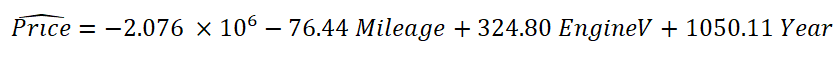

>- Jika nilai seluruh variabel independen 0 atau konstan, maka harga mobil akan menurun sebesar $2.076 x 10^6$ dolar.
>- Setiap kenaikan 1 mil pada jarak tempuh, maka harga mobil akan menurun sebesar 76.44 dolar.
>- Setiap kenaikan 1 galon pada kapasitas mobil, maka harga mobil akan meningkat sebesar 324.80 dolar.
>- Setiap kenaikan 1 tahun, maka harga mobil akan meningkat sebesar 1050.11 dolar.

**Hubungan variabel independen terhadap dependen secara simultan (uji F)**
>- Nilai F value = $1.07 x 10^-163$ menunjukkan setidaknya ada 1 variabel independen berpengaruh secara simultan terhadap variabel harga mobil.

**Hubungan variabel independen terhadap dependen secara parsial (uji t)**
>- Nilai t value 'Milage' sebesar 0.000 menunjukkan variabel jarak tempuh berpengaruh secara parsial terhadap variabel harga mobil.
>- Nilai t value 'EngineV' sebesar 0.000 menunjukkan variabel kapasitas mobil berpengaruh secara parsial terhadap variabel harga mobil.
>- Nilai t value 'Year' sebesar 0.000 menunjukkan variabel tahun keluar mobil berpengaruh secara parsial terhadap variabel harga mobil.

**Kesimpulan
>- Dari hasil P-value menunjukkan jarak tempuh, kapasitas mobil, dan tahun keluar mobil mempengaruhi harga jual mobil.

**15. Buat scatter plot untuk membandingkan y_test dan prediction! Apa komentar Anda?**

Text(0.5, 1.0, 'Actual vs Predicted of Price')

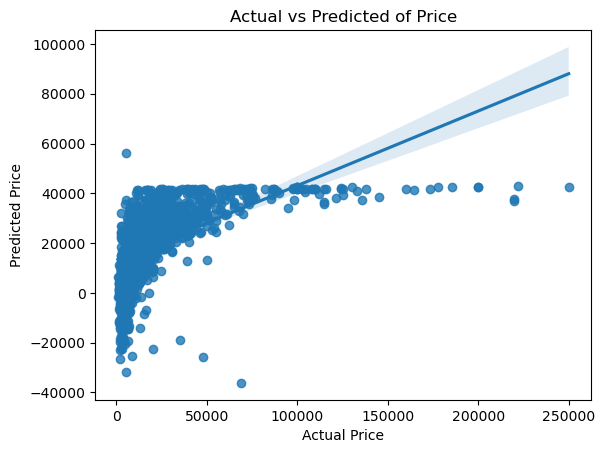

In [30]:
##### Jawaban #####

#Plot regresi
sns.regplot(x = y_test, y = y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted of Price')

Dari hasil plot **Price** aktual dengan prediksi **Price** menunjukkan bahwa kurang mendekati garis linier. Artinya, prediksi model tidak terlalu bagus karena korelasi yang lemah antara nilai aktual dengan prediksi model. Hal ini berakibat pada jauhnya perbedaan nilai prediksi dengan nilai aktual.

In [31]:
#Nilai aktual Price dengan prediksi Y
pd.DataFrame(zip(y_test, y_pred))

,0,1
0,23000.0,30197.130531
1,8900.0,25823.785744
2,14300.0,18009.765049
3,8300.0,28828.102647
4,8500.0,11257.317848
...,...,...
1605,8500.0,-4149.951297
1606,6900.0,-7968.227706
1607,17500.0,28515.495403
1608,12800.0,23417.106727
